# Data Science Aplicada à Área da Saúde

Projeto de análise de dados da formação FIAMED da [DSA](https://www.datascienceacademy.com.br/)

## Modelagem Estatística - Previsão de infarto

__Definindo o Problema__

A Organização Mundial de Saúde estima que 12 milhões de mortes ocorrem em todo o mundo, todos os anos devido a doenças cardíacas. Metade das mortes nos Estados Unidos e em outros países desenvolvidos se deve a doenças cardiovasculares. O prognóstico precoce de doenças cardiovasculares pode ajudar na tomada de decisões sobre mudanças no estilo de vida em pacientes de alto risco e, por sua vez, reduzir as complicações. Esta análise pretende identificar os fatores de risco mais relevantes para doenças cardíacas.

Framingham Heart Study

https://datacatalog.med.nyu.edu/dataset/10046

O Framingham Heart Study (FHS) é dedicado à identificação de fatores ou características comuns que contribuem para doenças cardiovasculares. Em 1948, uma amostra de 5.209 homens e mulheres entre 30 e 62 anos foi recrutada em Framingham, Massachusetts para o estudo. Outras amostras foram coletadas em 1971, 1994, 2002 e 2004. A pesquisa principal do conjunto de dados concentra-se em doenças cardiovasculares. Os dados incluem amostras biológicas, dados genéticos moleculares, dados de fenótipo, imagens, dados de funcionamento vascular do participante, dados fisiológicos, dados demográficos e dados de ECG. É um projeto colaborativo do National Heart, Lung and Blood Institute e Universidade de Boston.

O conjunto de dados fornece as informações dos pacientes. Cada atributo é um fator de risco potencial. Existem fatores de risco demográficos, comportamentais e médicos.

Nosos trabalho é analisar a relação das variáveis preditoras com a variável alvo, pacientes que tiveram ou não doenças cardiovasculares!

Devemos responder a seguinte pergunta: Quais fatores mais contribuem para que um paciente venha a desenvolver doenças cardiovasculares em um período de 10 anos?

Para compreender mais sobre o problema, acesse:

https://www.who.int/en/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)

### Base de dados

In [1]:
# Importar pacotes
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Carregando os dados
df_pacientes = pd.read_csv("dados/pacientes.csv")

# Visualizar o dataset
df_pacientes.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


__Dicionário de variáveis__

Demográfico:

- Sex: masculino ou feminino (variável categórica)
- Age: idade do paciente (variável numérica)
- Education: nenhuma informação adicional é fornecida (variável categórica)

Comportamental:

- Current Smoker: se o paciente é ou não fumante atual (variável categórica)
- Cigs Per Day: o número de cigarros que a pessoa fumava em média em um dia (variável numérica)

Informações sobre histórico médico:

- BP Meds: se o paciente estava ou não fazendo uso de medicamentos para pressão arterial (variável categórica)
- Prevalent Stroke: se o paciente já teve ou não um AVC (variável categórica)
- Prevalent Hyp: se o paciente era ou não hipertenso (variável categórica)
- Diabetes: se o paciente teve ou não diabetes (variável categórica)

Informações sobre a condição médica atual:

- Tot Chol: nível total de colesterol (variável numérica)
- Sys BP: pressão arterial sistólica (variável numérica)
- Dia BP: pressão arterial diastólica  (variável numérica)
- BMI: Índice de Massa Corporal (variável numérica)
- Heart Rate: frequência cardíaca (variável numérica)
- Glucose: nível de glicose (variável numérica)

Variável de destino:

- TenYearCHD - Risco de 10 anos de doença cardíaca coronária (CHD - Coronary Heart Disease ) - (binário: "1" significa "Sim", "0" significa "Não")

### Análise exploratória e Limpeza de dados

In [3]:
# Dimensões
print(f'Número de linhas:\t{df_pacientes.shape[0]}')
print(f'Número de colunas:\t{df_pacientes.shape[1]}')

Número de linhas:	4240
Número de colunas:	16


In [4]:
# Tipo de dados
df_pacientes.dtypes

sex                  int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [5]:
# Estatísticas das features
df_pacientes.describe()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


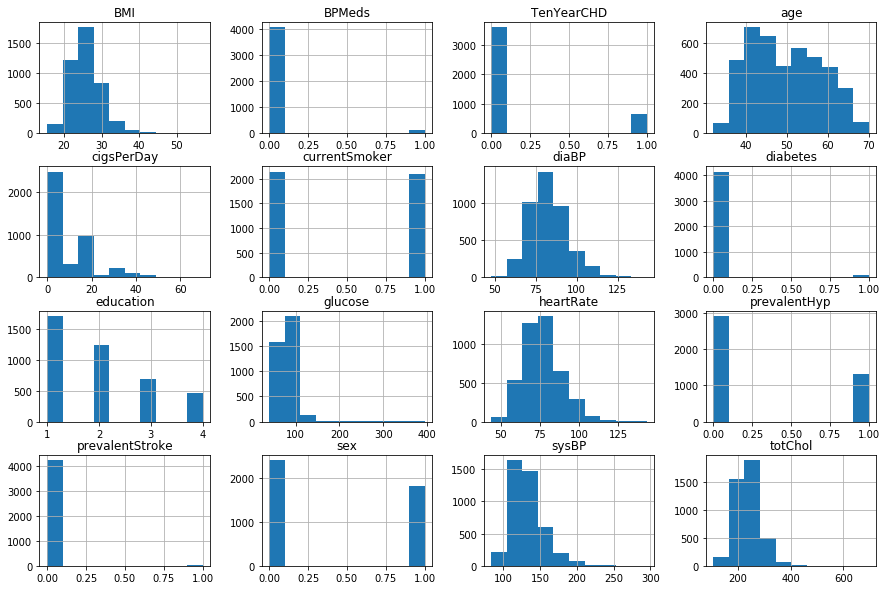

In [6]:
df_pacientes.hist(figsize=(15,10));

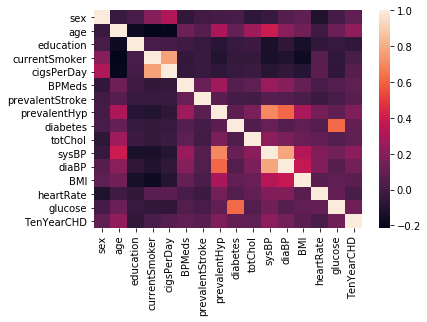

In [7]:
# Verificando a Correlação
df_pacientes_corr = df_pacientes.corr()
sns.heatmap(df_pacientes_corr, );

Serapando variáveis categóricas e numéricas

In [8]:
# Criando uma cópia do dataset original
df_pacientes_teste = df_pacientes.copy()

In [9]:
# Cópia do dataset
df_pacientes_teste.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [10]:
# Convertendo as variáveis categóricas para o tipo categórico em Python
# Como queremos apenas avaliar a associação com a variável resposta estamos trabalhando com uma cópia do dataset original.
df_pacientes_teste['sex'] = df_pacientes_teste['sex'].astype('category')
df_pacientes_teste['education'] = df_pacientes_teste['education'].astype('category')
df_pacientes_teste['currentSmoker'] = df_pacientes_teste['currentSmoker'].astype('category')
df_pacientes_teste['BPMeds'] = df_pacientes_teste['BPMeds'].astype('category')
df_pacientes_teste['prevalentStroke'] = df_pacientes_teste['prevalentStroke'].astype('category')
df_pacientes_teste['prevalentHyp'] = df_pacientes_teste['prevalentHyp'].astype('category')
df_pacientes_teste['diabetes'] = df_pacientes_teste['diabetes'].astype('category')
df_pacientes_teste['TenYearCHD'] = df_pacientes_teste['TenYearCHD'].astype('category')

In [11]:
# Visualizando os tipos de dados
df_pacientes_teste.dtypes

sex                category
age                   int64
education          category
currentSmoker      category
cigsPerDay          float64
BPMeds             category
prevalentStroke    category
prevalentHyp       category
diabetes           category
totChol             float64
sysBP               float64
diaBP               float64
BMI                 float64
heartRate           float64
glucose             float64
TenYearCHD         category
dtype: object

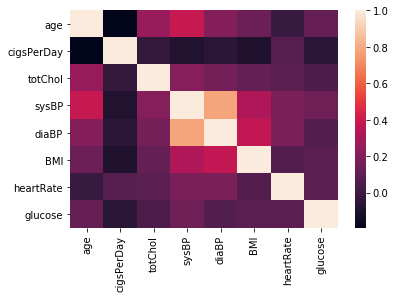

In [12]:
# Coeficiente de correlação é calculado para variáveis numéricas
df_pacientes_corr = df_pacientes_teste.corr()
sns.heatmap(df_pacientes_corr);

In [13]:
# Função para calcular a associação entre variáveis categóricas

# Pacote stats do Scipy
import scipy.stats as ss

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

# Em Estatística, Cramér-V é uma medida de associação entre duas variáveis categóricas, fornecendo um valor 
# entre 0 e +1 (inclusive). É baseado na estatística do qui-quadrado (chi2) de Pearson e foi publicado 
# por Harald Cramér em 1946. 

# A Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.

# Função
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    
    # Teste qui-quadrado de independência de variáveis em uma tabela de contingência.
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [14]:
# Coleta as variáveis categóricas do dataset
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

categorical_vars = []

for column in df_pacientes_teste:
    if is_string_dtype(df_pacientes_teste[column]):
        categorical_vars.append(column)

In [15]:
categorical_vars

['sex',
 'education',
 'currentSmoker',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [16]:
y = 'TenYearCHD'

print('\nA Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.')
print('\n')

for var in categorical_vars:
    print(f'Associação da Variável {var} com a variável resposta:', 
          cramers_v(df_pacientes_teste[var], df_pacientes_teste[y]).round(2))


A Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.


Associação da Variável sex com a variável resposta: 0.09
Associação da Variável education com a variável resposta: 0.08
Associação da Variável currentSmoker com a variável resposta: 0.01
Associação da Variável BPMeds com a variável resposta: 0.08
Associação da Variável prevalentStroke com a variável resposta: 0.06
Associação da Variável prevalentHyp com a variável resposta: 0.18
Associação da Variável diabetes com a variável resposta: 0.09
Associação da Variável TenYearCHD com a variável resposta: 1.0


Removeremos do dataset a coluna education. Primeiro porque ela não tem correlação (associação) com a variável resposta e segundo porque usar a educação para compreender fatores de risco poderia ser algo subjetivo. Além de tudo isso, não temos mais detalhes sobre essa variável. Manteremos as demais variáveis por enquanto.

In [17]:
# Removendo a coluna education
df_pacientes = df_pacientes.drop(['education'], axis = 1)

### Tratamento dos valores ausentes

In [18]:
# Missing values
df_pacientes.isnull().mean().sort_values(ascending=False)

glucose            0.091509
BPMeds             0.012500
totChol            0.011792
cigsPerDay         0.006840
BMI                0.004481
heartRate          0.000236
TenYearCHD         0.000000
diaBP              0.000000
sysBP              0.000000
diabetes           0.000000
prevalentHyp       0.000000
prevalentStroke    0.000000
currentSmoker      0.000000
age                0.000000
sex                0.000000
dtype: float64

In [19]:
# Removendo todas as linhas com valores NA
df_pacientes = df_pacientes.dropna()
df_pacientes.isnull().mean().sort_values(ascending=False)

TenYearCHD         0.0
glucose            0.0
heartRate          0.0
BMI                0.0
diaBP              0.0
sysBP              0.0
totChol            0.0
diabetes           0.0
prevalentHyp       0.0
prevalentStroke    0.0
BPMeds             0.0
cigsPerDay         0.0
currentSmoker      0.0
age                0.0
sex                0.0
dtype: float64

### Tratamento de outliers

Variável __totChol__

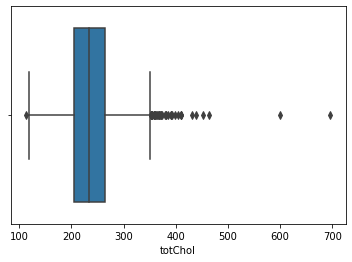

In [20]:
# Visualizando os outliers da variável totChol
sns.boxplot(df_pacientes.totChol);

In [21]:
# Obs: Nível total de colesterol acima de 240 já é ruim
outliers_totChol = df_pacientes[(df_pacientes['totChol'] > 500)] 
outliers_totChol

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1111,0,52,0,0.0,0.0,0,1,1,600.0,159.5,94.0,28.27,78.0,140.0,1
3160,1,51,1,9.0,0.0,0,1,0,696.0,157.0,87.0,24.44,95.0,84.0,0


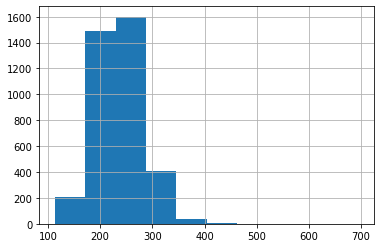

In [22]:
# Histograma da variável totChol antes da limpeza
df_pacientes.totChol.hist();

In [23]:
# Remover os outliers
df_pacientes = df_pacientes.drop(df_pacientes[df_pacientes.totChol > 500].index)

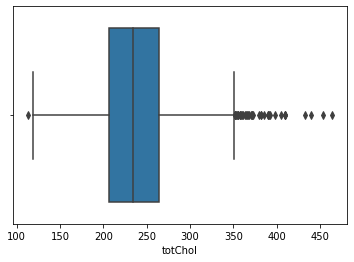

In [24]:
# Visualizando os outliers da variável totChol depois da limpeza
sns.boxplot(df_pacientes.totChol);

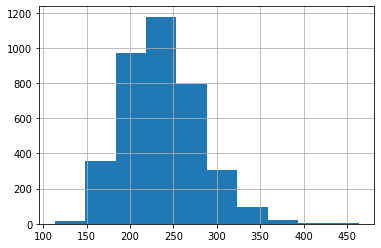

In [25]:
# Histograma da variável totChol depois da limpeza
df_pacientes.totChol.hist();

Variável __glucose__

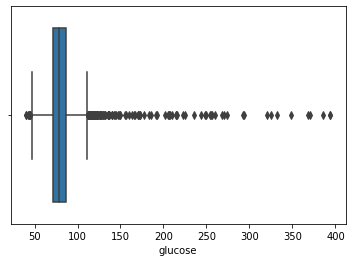

In [26]:
# Visualizando os outliers da variável glucose
sns.boxplot(df_pacientes.glucose);

In [27]:
# Obs: Valores de nível de glicose acima de 100 mg/dl, em jejum, já podem ser prejudiciais. 
# A relação tempo e dano é muito individual. 
outliers_glucose = df_pacientes[(df_pacientes['glucose'] > 300)] 
outliers_glucose

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1363,1,55,1,40.0,0.0,0,0,1,205.0,127.0,76.0,22.24,90.0,325.0,1
2406,0,62,0,0.0,0.0,0,0,1,233.0,130.0,87.0,21.34,85.0,386.0,0
2801,0,47,1,1.0,0.0,0,1,1,160.0,197.0,109.0,34.91,82.0,320.0,1
2893,1,62,0,0.0,0.0,0,0,1,346.0,102.5,66.5,17.17,80.0,394.0,1
2909,0,67,0,0.0,1.0,0,1,1,303.0,204.0,96.0,27.86,75.0,394.0,1
3817,1,47,1,20.0,0.0,0,1,1,296.0,141.0,93.0,28.50,68.0,332.0,1
3844,0,62,1,20.0,1.0,0,1,1,358.0,215.0,110.0,37.62,110.0,368.0,1
3849,0,46,1,15.0,0.0,0,0,1,233.0,106.0,60.0,20.84,75.0,348.0,0
3971,1,64,0,0.0,0.0,0,1,1,195.0,176.0,78.0,24.90,95.0,370.0,0


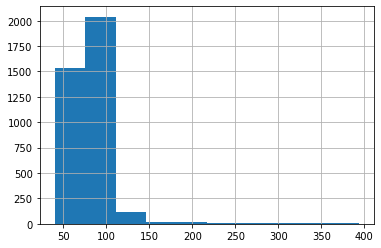

In [28]:
# Histograma da variável glucose antes da limpeza
df_pacientes.glucose.hist();

In [29]:
# Remover os outliers
df_pacientes = df_pacientes.drop(df_pacientes[df_pacientes.glucose > 300].index)

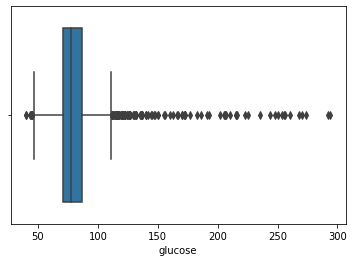

In [30]:
# Visualizando os outliers da variável glucose depois da limpeza
sns.boxplot(df_pacientes.glucose);

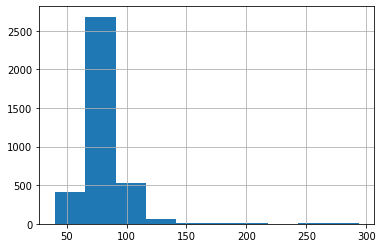

In [31]:
# Histograma da variável glucose depois da limpeza
df_pacientes.glucose.hist();

### Variável dependente (target)

In [32]:
# Verificando se a variável resposta está balanceada
target_count = df_pacientes.TenYearCHD.value_counts()
print('Classe 0:', target_count[0])
print('Classe 1:', target_count[1])
print('Proporção:', round(target_count[0] / target_count[1], 2), ': 1')

Classe 0: 3175
Classe 1: 565
Proporção: 5.62 : 1


Podemos ver que a proporção é de 5,62: 1, que não está bem equilibrada. Um dos principais problemas ao lidar com conjuntos de dados desequilibrados refere-se às métricas usadas para avaliar um modelo. O uso de métricas mais simples, como __acurácia__, pode ser enganoso. Em um conjunto de dados com classes altamente desequilibradas, se o classificador sempre "predizer" a classe mais comum sem realizar nenhuma análise dos recursos, ele ainda terá uma alta taxa de __acurácia__, obviamente ilusória.

### Pré-Processamento dos Dados - Reamostragem de Dados Desequilibrados

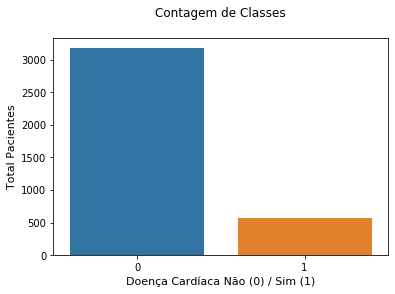

In [33]:
# Plot 
sns.countplot(df_pacientes.TenYearCHD)
plt.xlabel('Doença Cardíaca Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total Pacientes', fontsize = 11)
plt.title('Contagem de Classes\n');

Possíveis soluções:
- Reduzir a classe majoritária - Undersampling
- Aumentar a classe minoritária - Oversampling

ou:

### SMOTE (Synthetic Minority Oversampling Technique)

SMOTE é um tipo de Dataset Augmentation.

Um problema com a classe desequilibrada é que existem poucos exemplos da classe minoritária para um modelo aprender efetivamente o limite da decisão.

Uma maneira de resolver esse problema é exagerar os exemplos na classe minoritária. Isso pode ser conseguido simplesmente duplicando exemplos da classe minoritária no conjunto de dados de treinamento antes de ajustar um modelo. Isso pode equilibrar a distribuição de classe, mas não fornece nenhuma informação adicional ao modelo.

Uma melhoria na duplicação de exemplos da classe minoritária é sintetizar novos exemplos da classe minoritária. Este é um tipo de aumento de dados para dados tabulares e pode ser muito eficaz.

Talvez a abordagem mais amplamente usada para sintetizar novos exemplos seja chamada Synthetic Minority Oversampling Technique, ou SMOTE, resumidamente. Essa técnica foi descrita por Nitesh Chawla, et al. em seu trabalho de 2002, nomeado para a técnica intitulada "SMOTE: Técnica de sobre-amostragem de minorias sintéticas".

https://arxiv.org/abs/1106.1813

O SMOTE funciona selecionando exemplos que estão próximos no espaço de recurso, desenhando uma linha entre os exemplos no espaço de recurso e desenhando uma nova amostra em um ponto ao longo dessa linha.

Especificamente, um exemplo aleatório da classe minoritária é escolhido primeiro. Em seguida, k dos vizinhos mais próximos desse exemplo é encontrado (normalmente k = 5). Um vizinho selecionado aleatoriamente é escolhido e um exemplo sintético é criado em um ponto selecionado aleatoriamente entre os dois exemplos no espaço de recurso.

O SMOTE primeiro seleciona uma instância de classe minoritária A aleatoriamente e encontra seus k vizinhos de classe minoritária mais próximos. A instância sintética é criada escolhendo um dos k vizinhos mais próximos B aleatoriamente e conectando A e B para formar um segmento de linha no espaço de recursos. As instâncias sintéticas são geradas como uma combinação convexa das duas instâncias escolhidas A e B.

In [34]:
# Processo de balanceamento de dados com SMOTE
## Importa a função
from imblearn.over_sampling import SMOTE

## Seed para reproduzir o mesmo resultado
seed = 100

## Separa X e y
X = df_pacientes.iloc[:, 0:14]  
y = df_pacientes.iloc[:, -1] 

## Cria o balanceador SMOTE
smote_bal = SMOTE(random_state = seed)

## Aplica o balanceador
X_res, y_res = smote_bal.fit_resample(X, y)

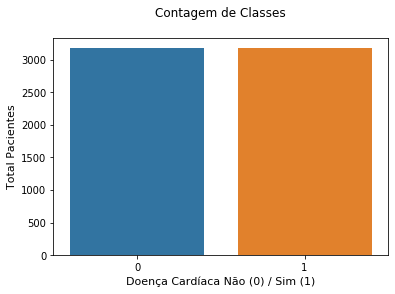

In [35]:
# Plot 
sns.countplot(y_res)
plt.xlabel('Doença Cardíaca Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total Pacientes', fontsize = 11)
plt.title('Contagem de Classes\n');

Vamos adicionar uma coluna com o valor constante 1 para todas as linhas. Isso é necessário para criar o modelo logit com o StatsModels.

In [36]:
# Adicionar a constante na matriz X
from statsmodels.tools import add_constant as add_constant
X_final = add_constant(X_res)
X_final.head()

,const,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [37]:
# Não temos mais transformações para y, geramos o dataset final
y_final = y_res
y_final.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

### Construindo o Modelo de Regressão Logística

#### Primeiro modelo

In [38]:
# Criando a primeira versão modelo de Regressão Logística com StatsModels

## Separa X e y
X = X_final
y = y_final

## Cria o objeto
logit_obj_v1 = sm.Logit(y, X)

## Cria o modelo
logit_modelo_v1 = logit_obj_v1.fit()

## Print do resultado
print(logit_modelo_v1.summary())

Optimization terminated successfully.
         Current function value: 0.594144
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 6350
Model:                          Logit   Df Residuals:                     6335
Method:                           MLE   Df Model:                           14
Date:                Fri, 19 Jun 2020   Pseudo R-squ.:                  0.1428
Time:                        08:57:14   Log-Likelihood:                -3772.8
converged:                       True   LL-Null:                       -4401.5
Covariance Type:            nonrobust   LLR p-value:                8.137e-260
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.4026      0.426    -19.723      0.000      -9.238      -7.568
sex           

- Log-Likelihood: este é o valor maximizado da função de probabilidade de log.


- LL-Null: este é o resultado da função maximizada de probabilidade de log quando apenas uma interceptação é incluída. Ele forma a base da estatística pseudo-R^2 e do teste Log-Likelihood Ratio (LRR).


- pseudo-R^2: substitui o familiar R^2 disponível em regressão linear. É calculado com base na razão da função de probabilidade logarítmica maximizada para o modelo nulo m0 e o modelo completo m1. Os valores variam de 0 (quando o modelo não melhora a probabilidade) a 1 (onde o modelo se encaixa perfeitamente e a probabilidade do log é maximizada em 0). Consequentemente, valores mais altos indicam um melhor ajuste.


- LLR: O teste LLR geralmente compara um modelo mais restrito. A hipótese nula é que o modelo restrito tem um desempenho melhor, mas um valor-p baixo sugere que podemos rejeitar essa hipótese e preferir o modelo completo ao invés do modelo nulo. Isso é semelhante ao teste F para regressão linear (onde também é possível usar o teste LLR quando estimamos o modelo usando MLE).


- z-statistic: desempenha o mesmo papel que a estatística t na saída da regressão linear e é igualmente calculada como a razão da estimativa do coeficiente e seu erro padrão.


- Valores-p: indicam a probabilidade de observar a estatística do teste, assumindo a hipótese nula H0 de que o coeficiente da população é zero.

__Vamos avaliar as métricas do modelo__

In [39]:
# Confusion Matrix do Modelo
logit_modelo_v1.pred_table()

array([[2134., 1041.],
       [ 947., 2228.]])

In [40]:
# Imprimindo 10 previsões do modelo
predictions_v1 = logit_modelo_v1.predict()
print(predictions_v1[0:10])

[0.12909687 0.3202055  0.40203042 0.87043922 0.51991106 0.55552858
 0.74810419 0.28535018 0.37326215 0.55990718]


In [41]:
# Defininido um limite para a classificação
y_pred_v1 = [0 if x < 0.5 else 1 for x in predictions_v1]

In [42]:
# Relatório de Classificação
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y, y_pred_v1))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68      3175
           1       0.68      0.70      0.69      3175

    accuracy                           0.69      6350
   macro avg       0.69      0.69      0.69      6350
weighted avg       0.69      0.69      0.69      6350



#### Segundo modelo

Será que se normalizamos os dados melhoramos o resultado?

In [43]:
# Cria o objeto scaler
scaler = MinMaxScaler(feature_range = (0,1)) 

# Normalizando as variáveis explicativas (não normalizamos a constante e nem a variável target)
X_final_scaled = pd.DataFrame(scaler.fit_transform(X_final.iloc[:,1:15]), columns = X_final.iloc[:,1:15].columns)

In [44]:
# Adicionar a constante na matriz X
from statsmodels.tools import add_constant as add_constant
X_final_scaled = add_constant(X_final_scaled)
X_final_scaled.head()

,const,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,1.0,0.184211,0.0,0.000000,0.0,0.0,0.0,0.0,0.233618,0.106383,0.232804,0.277024,0.363636,0.145669
1,1.0,0.0,0.368421,0.0,0.000000,0.0,0.0,0.0,0.0,0.390313,0.177305,0.349206,0.319680,0.515152,0.141732
2,1.0,1.0,0.421053,1.0,0.285714,0.0,0.0,0.0,0.0,0.376068,0.208038,0.338624,0.237518,0.313131,0.118110
3,1.0,0.0,0.763158,1.0,0.428571,0.0,0.0,1.0,0.0,0.319088,0.314421,0.497354,0.316045,0.212121,0.248031
4,1.0,0.0,0.368421,1.0,0.328571,0.0,0.0,0.0,0.0,0.490028,0.219858,0.380952,0.183228,0.414141,0.177165


In [45]:
# Criando a segunda versão modelo de Regressão Logística com StatsModels

## Separa X e y
X = X_final_scaled
y = y_final

## Cria o objeto
logit_obj_v2 = sm.Logit(y, X)

## Cria o modelo
logit_modelo_v2 = logit_obj_v2.fit()

## Print do resultado
print(logit_modelo_v2.summary())

Optimization terminated successfully.
         Current function value: 0.594144
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 6350
Model:                          Logit   Df Residuals:                     6335
Method:                           MLE   Df Model:                           14
Date:                Fri, 19 Jun 2020   Pseudo R-squ.:                  0.1428
Time:                        08:57:15   Log-Likelihood:                -3772.8
converged:                       True   LL-Null:                       -4401.5
Covariance Type:            nonrobust   LLR p-value:                8.137e-260
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.3381      0.184    -18.159      0.000      -3.698      -2.978
sex           

__Vamos avaliar as métricas do modelo__

In [46]:
# Confusion Matrix do Modelo
logit_modelo_v2.pred_table()

array([[2134., 1041.],
       [ 947., 2228.]])

In [47]:
# Imprimindo 10 previsões do modelo
predictions_v2 = logit_modelo_v2.predict()
print(predictions_v2[0:10])

[0.12909687 0.3202055  0.40203042 0.87043922 0.51991106 0.55552858
 0.74810419 0.28535018 0.37326215 0.55990718]


In [48]:
# Defininido um limite para a classificação
y_pred_v2 = [0 if x < 0.5 else 1 for x in predictions_v2]

In [49]:
# Relatório de Classificação
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y, y_pred_v2))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68      3175
           1       0.68      0.70      0.69      3175

    accuracy                           0.69      6350
   macro avg       0.69      0.69      0.69      6350
weighted avg       0.69      0.69      0.69      6350



### Seleção de Atributos (Feature Selection)

In [50]:
# Identificando os atributos de maior importância para a variável de resultado

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Separando as variáveis explicativas da variável resposta (não adicionamos a constante)
X = X_final.iloc[:,1:15]
y = y_final

# Aplicando SelectKBest para extrair os melhores recursos
bestfeatures = SelectKBest(score_func = chi2, k = 10)
fit = bestfeatures.fit(X,y)

# Retorna os scores e as colunas
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concatenando os dois resultados anteriores para melhor visualização
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Atributos','Score']  

# Imprime os 10 melhores atributos em ordem descrescente
print(featureScores.nlargest(14, 'Score')) 

          Atributos        Score
9             sysBP  2030.203811
1               age   863.156342
8           totChol   697.061111
13          glucose   485.945099
10            diaBP   481.991015
3        cigsPerDay   306.591360
6      prevalentHyp    96.980180
4            BPMeds    54.862007
11              BMI    53.000455
2     currentSmoker    20.162725
7          diabetes     8.000000
12        heartRate     4.581821
0               sex     4.251832
5   prevalentStroke     1.190476


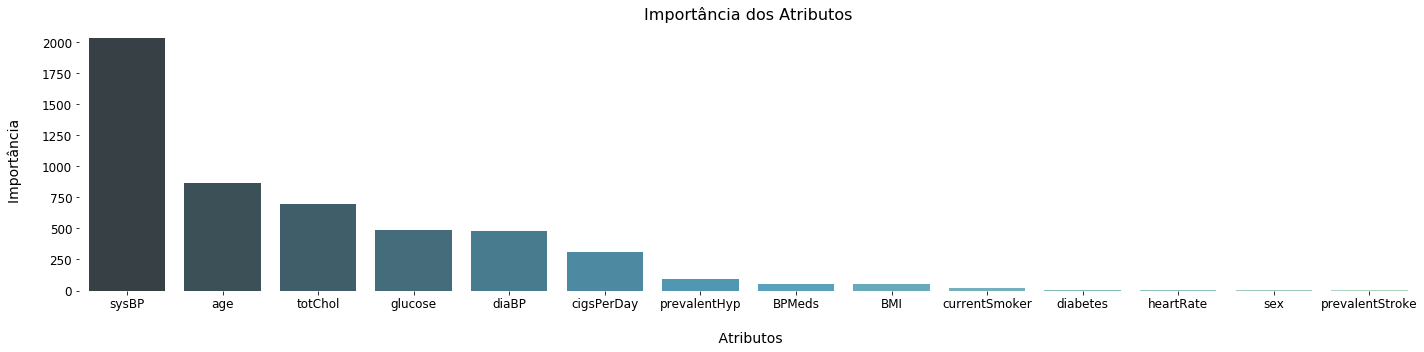

In [51]:
# Visualizando os atributos mais importantes

# Vamos colocar os scores em uma tabela e então criar um gráfico
featureScores = featureScores.sort_values(by = 'Score', ascending = False)
featureScores

# Plot
plt.figure(figsize = (20,5))
sns.barplot(x = 'Atributos', y = 'Score', data = featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Importância dos Atributos', fontsize = 16)
plt.xlabel('\n Atributos', fontsize = 14)
plt.ylabel('Importância \n', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()

In [52]:
# Selecionando os 9 atributos com maior impacto para compreender a variável resposta
features_list = featureScores["Atributos"].tolist()[:9]
features_list

['sysBP',
 'age',
 'totChol',
 'glucose',
 'diaBP',
 'cigsPerDay',
 'prevalentHyp',
 'BPMeds',
 'BMI']

Manteremos apenas os recursos que têm o relacionamento mais forte com a variável de saída. Esses recursos são:

In [53]:
# Criando um dataframe com os atributos de maior importância
# Removemos as 2 variáveis categóricas com base na análise de associação feita anteriormente.
X_final_importance = X_final[['sysBP', 
                              'age', 
                              'totChol', 
                              'diaBP', 
                              'cigsPerDay', 
                              'glucose', 
                              'BMI']]

# Adiciona a constante
from statsmodels.tools import add_constant as add_constant
X_final_importance = add_constant(X_final_importance)
X_final_importance.head()

,const,sysBP,age,totChol,diaBP,cigsPerDay,glucose,BMI
0,1.0,106.0,39,195.0,70.0,0.0,77.0,26.97
1,1.0,121.0,46,250.0,81.0,0.0,76.0,28.73
2,1.0,127.5,48,245.0,80.0,20.0,70.0,25.34
3,1.0,150.0,61,225.0,95.0,30.0,103.0,28.58
4,1.0,130.0,46,285.0,84.0,23.0,85.0,23.10


#### Terceiro modelo

In [54]:
# Criando a terceira versão modelo de Regressão Logística com StatsModels

# Separa X e y
X = X_final_importance
y = y_final

# Cria o objeto
logit_obj_v3 = sm.Logit(y, X)

# Cria o modelo
logit_modelo_v3 = logit_obj_v3.fit()

# Print do resultado
print(logit_modelo_v3.summary())

Optimization terminated successfully.
         Current function value: 0.609537
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 6350
Model:                          Logit   Df Residuals:                     6342
Method:                           MLE   Df Model:                            7
Date:                Fri, 19 Jun 2020   Pseudo R-squ.:                  0.1206
Time:                        08:57:15   Log-Likelihood:                -3870.6
converged:                       True   LL-Null:                       -4401.5
Covariance Type:            nonrobust   LLR p-value:                5.207e-225
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.0678      0.332    -24.290      0.000      -8.719      -7.417
sysBP          0.0139      0.

__Vamos avaliar as métricas do modelo__

In [55]:
# Confusion Matrix do Modelo
logit_modelo_v3.pred_table()

array([[2092., 1083.],
       [1002., 2173.]])

In [56]:
# Imprimindo 10 previsões do modelo
predictions_v3 = logit_modelo_v3.predict()
print(predictions_v3[0:10])

[0.13902236 0.28993488 0.44759071 0.84756541 0.47739263 0.50174875
 0.65700834 0.31711929 0.47046385 0.59258747]


In [57]:
# Defininido um limite para a classificação
y_pred_v3 = [0 if x < 0.5 else 1 for x in predictions_v3]

In [58]:
# Relatório de Classificação
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y, y_pred_v3))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67      3175
           1       0.67      0.68      0.68      3175

    accuracy                           0.67      6350
   macro avg       0.67      0.67      0.67      6350
weighted avg       0.67      0.67      0.67      6350



### Método de normalização das variáveis

In [59]:
# Cria o objeto scaler
scaler = MinMaxScaler(feature_range = (0,1)) 

# Normalizando as variáveis explicativas (não normalizamos a constante e nem a variável target)
X_final_scaled_v2 = pd.DataFrame(scaler.fit_transform(X_final_importance.iloc[:,1:11]), 
                                 columns = X_final_importance.iloc[:,1:11].columns)

# Adiciona a constante
from statsmodels.tools import add_constant as add_constant
X_final_scaled_v2 = add_constant(X_final_scaled_v2)
X_final_scaled_v2.head()

,const,sysBP,age,totChol,diaBP,cigsPerDay,glucose,BMI
0,1.0,0.106383,0.184211,0.233618,0.232804,0.000000,0.145669,0.277024
1,1.0,0.177305,0.368421,0.390313,0.349206,0.000000,0.141732,0.319680
2,1.0,0.208038,0.421053,0.376068,0.338624,0.285714,0.118110,0.237518
3,1.0,0.314421,0.763158,0.319088,0.497354,0.428571,0.248031,0.316045
4,1.0,0.219858,0.368421,0.490028,0.380952,0.328571,0.177165,0.183228


#### Quarto modelo

In [60]:
# Criando a quarta versão modelo de Regressão Logística com StatsModels

# Separa X e y
X = X_final_scaled_v2
y = y_final

# Cria o objeto
logit_obj_v4 = sm.Logit(y, X)

# Cria o modelo
logit_modelo_v4 = logit_obj_v4.fit()

# Print do resultado
print(logit_modelo_v4.summary())

Optimization terminated successfully.
         Current function value: 0.609537
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 6350
Model:                          Logit   Df Residuals:                     6342
Method:                           MLE   Df Model:                            7
Date:                Fri, 19 Jun 2020   Pseudo R-squ.:                  0.1206
Time:                        08:57:16   Log-Likelihood:                -3870.6
converged:                       True   LL-Null:                       -4401.5
Covariance Type:            nonrobust   LLR p-value:                5.207e-225
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4195      0.154    -22.246      0.000      -3.721      -3.118
sysBP          2.9403      0.

### Feature Selection: Backward Elimination (P-value Approach)

Recebe o dataframe, a variável dependente e uma lista de nomes de colunas, executa o recurso de eliminação repetitiva de regressão com o mais alto valor-p acima de alfa, um de cada vez, e retorna o resumo da regressão com todos os valores-p abaixo de alfa.

In [61]:
# Lista com o nome das variáveis explicativas
cols_names = X.columns
cols_names

Index(['const', 'sysBP', 'age', 'totChol', 'diaBP', 'cigsPerDay', 'glucose',
       'BMI'],
      dtype='object')

In [62]:
# Função
def back_feature_elem (x, y, col_list):

    while len(col_list) > 0 :
        modelo = sm.Logit(y, x[col_list])
        result = modelo.fit()
        largest_pvalue = round(result.pvalues, 3).nlargest(1)
        
        if largest_pvalue[0] < (0.05):
            return result
            break
        else:
            col_list = col_list.drop(largest_pvalue.index)

#### Quinto modelo

In [63]:
# Separa X e y
X = X_final_importance
y = y_final

# Cria o modelo sem os atributos com maior valor-p
logit_modelo_v5 = back_feature_elem(X, y, cols_names)

Optimization terminated successfully.
         Current function value: 0.609537
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.609692
         Iterations 5


In [64]:
# Print do resultado
print(logit_modelo_v5.summary())

                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 6350
Model:                          Logit   Df Residuals:                     6343
Method:                           MLE   Df Model:                            6
Date:                Fri, 19 Jun 2020   Pseudo R-squ.:                  0.1204
Time:                        08:57:16   Log-Likelihood:                -3871.5
converged:                       True   LL-Null:                       -4401.5
Covariance Type:            nonrobust   LLR p-value:                9.962e-226
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.9146      0.313    -25.307      0.000      -8.528      -7.302
sysBP          0.0163      0.001     11.815      0.000       0.014       0.019
age            0.0748      0.004     19.298      0.0

__Vamos avaliar as métricas do modelo__

In [65]:
# Confusion Matrix do Modelo
logit_modelo_v5.pred_table()

array([[2101., 1074.],
       [1018., 2157.]])

In [66]:
# Imprimindo 10 previsões do modelo
predictions_v5 = logit_modelo_v5.predict()
print(predictions_v5[0:10])

[0.14245944 0.28973177 0.44940154 0.84293327 0.47378588 0.49845271
 0.67540673 0.31355359 0.4679984  0.57821975]


In [67]:
# Defininido um limite para a classificação
y_pred_v5 = [0 if x < 0.5 else 1 for x in predictions_v5]

In [68]:
# Relatório de Classificação
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y, y_pred_v5))

              precision    recall  f1-score   support

           0       0.67      0.66      0.67      3175
           1       0.67      0.68      0.67      3175

    accuracy                           0.67      6350
   macro avg       0.67      0.67      0.67      6350
weighted avg       0.67      0.67      0.67      6350



## GLM

Em Estatística, o Modelo Linear Generalizado (GLM) é uma generalização flexível da regressão linear comum que permite variáveis resposta que possuem modelos de distribuição de erro diferentes de uma distribuição normal. O GLM generaliza a regressão linear, permitindo que o modelo linear seja relacionado à variável de resposta por meio de uma função de link e permitindo que a magnitude da variação de cada medição seja uma função do seu valor previsto.

### LMR vs IRLS

O método de estimação de parâmetros usado no `statsmodels.Logit` é o Maximum Likelihood Estimation (MLE). Este método é amplamente usado para estimar parametros que utilizam funções que tentam maximizar probabilidades (regressão logística, poisson etc.). O método de otimização usado é o Newton-Raphson, no caso, ao usá-lo em uma função de verossimilhança e junto de uma matriz Hensiana, leva o neme de Fisher Scoring.

O método de estimação de parâmetros usado no `statsmodels.GLM` é o Iteratively Reweighted Least Squares (IRLS).

O método de mínimos quadrados iterativamente ponderados (IRLS) é usado para resolver certos problemas de otimização com funções objetivas na forma de uma norma-p:

$$\underset{\beta}{\operatorname{argmin}} \sum^{n}_{i=1} \bracevert y_{i} - f_{i}(\beta) \bracevert^{p}$$

por um método iterativo no qual cada etapa envolve a solução de um problema de mínimos quadrados ponderados da forma:

$$\beta^{(t+1)}=\underset{\beta}{\operatorname{argmin}} \sum^{n}_{i=1} w_{i}(\beta^{(t)})\bracevert y_{i} - f_{i}(\beta) \bracevert^{2}$$

O IRLS é usado para encontrar as estimativas de máxima verossimilhança de um modelo linear generalizado e em regressão robusta para encontrar um estimador M, como uma maneira de mitigar a influência de outliers em um conjunto de dados normalmente distribuído. Por exemplo, o algorítmo minimiza o erro absoluto mínimo em vez do erro quadrado mínimo.

In [69]:
# Primeira versão do modelo GLM
modelo_v1 = sm.GLM(y, X, family = sm.families.Binomial())
glm_modelo_v1 = modelo_v1.fit()

In [70]:
glm_modelo_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 6350
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3870.6
Date:                Fri, 19 Jun 2020   Deviance:                       7741.1
Time:                        08:57:16   Pearson chi2:                 6.37e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.0678      0.332    -24.290      0.000      -8.719      -7.417
sysBP          0.0139      0.002      6.323      0.000       0.010       0.018
age            0.0762      0.004     19.054      0.000       0.068       0.084
totChol        0.0018      0.001      2.752      0.006       0.001       0.003
diaBP          0.0055      0.004      1.401      0.161      -0.002       0.013
cigsPerDay     0.0283      0.002     11.576      0.000       0.024       0.033
glucose        0.0069      0.001      5.456      0.000       0.004       0.009
BMI            0.0199      0.008      2.537      0.011       0.005       0.035
==============================================================================
"""

In [71]:
# Previsões do modelo
predictions_glm1 = glm_modelo_v1.predict()
print(predictions_glm1[0:10])

[0.13902236 0.28993488 0.44759071 0.84756541 0.47739263 0.50174875
 0.65700834 0.31711929 0.47046385 0.59258747]


In [72]:
y_pred_glm1 = [0 if x < 0.5 else 1 for x in predictions_glm1]

In [73]:
# Relatório de Classificação
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y, y_pred_glm1))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67      3175
           1       0.67      0.68      0.68      3175

    accuracy                           0.67      6350
   macro avg       0.67      0.67      0.67      6350
weighted avg       0.67      0.67      0.67      6350



Removendo a variável que não foi estatísticamente significante - __diaBP__

In [74]:
# Removendo a coluna diaBP
X = X.drop(['diaBP'], axis = 1)

In [75]:
# Segunda versão do modelo GLM
modelo_v2 = sm.GLM(y, X, family = sm.families.Binomial())
glm_modelo_v2 = modelo_v2.fit()

In [76]:
glm_modelo_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 6350
Model:                            GLM   Df Residuals:                     6343
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3871.5
Date:                Fri, 19 Jun 2020   Deviance:                       7743.1
Time:                        08:57:16   Pearson chi2:                 6.38e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.9146      0.313    -25.307      0.000      -8.528      -7.302
sysBP          0.0163      0.001     11.815      0.000       0.014       0.019
age            0.0748      0.004     19.298      0.000       0.067       0.082
totChol        0.0018      0.001      2.737      0.006       0.001       0.003
cigsPerDay     0.0282      0.002     11.540      0.000       0.023       0.033
glucose        0.0068      0.001      5.365      0.000       0.004       0.009
BMI            0.0224      0.008      2.937      0.003       0.007       0.037
==============================================================================
"""

In [77]:
# Previsões do modelo
predictions_glm2 = glm_modelo_v2.predict()
print(predictions_glm2[0:10])

[0.14245944 0.28973177 0.44940154 0.84293327 0.47378588 0.49845271
 0.67540673 0.31355359 0.4679984  0.57821975]


In [78]:
# Definindo o limite
y_pred_glm2 = [0 if x < 0.5 else 1 for x in predictions_glm2]

In [79]:
# Relatório de Classificação
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y, y_pred_glm2))

              precision    recall  f1-score   support

           0       0.67      0.66      0.67      3175
           1       0.67      0.68      0.67      3175

    accuracy                           0.67      6350
   macro avg       0.67      0.67      0.67      6350
weighted avg       0.67      0.67      0.67      6350



### Interpretação dos Resultados: Odds Ratio, Intervalos de Confiança e Valores-p

In [80]:
# Print do resultado do último modelo - modelo_v5
print(logit_modelo_v5.summary())

                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 6350
Model:                          Logit   Df Residuals:                     6343
Method:                           MLE   Df Model:                            6
Date:                Fri, 19 Jun 2020   Pseudo R-squ.:                  0.1204
Time:                        08:57:16   Log-Likelihood:                -3871.5
converged:                       True   LL-Null:                       -4401.5
Covariance Type:            nonrobust   LLR p-value:                9.962e-226
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.9146      0.313    -25.307      0.000      -8.528      -7.302
sysBP          0.0163      0.001     11.815      0.000       0.014       0.019
age            0.0748      0.004     19.298      0.0

In [81]:
# Parâmetros do modelo
logit_modelo_v5.params

const        -7.914578
sysBP         0.016311
age           0.074848
totChol       0.001766
cigsPerDay    0.028168
glucose       0.006801
BMI           0.022374
dtype: float64

In [82]:
# Parâmetros do modelo exponenciados
np.exp(logit_modelo_v5.params)

const         0.000365
sysBP         1.016445
age           1.077721
totChol       1.001768
cigsPerDay    1.028569
glucose       1.006824
BMI           1.022626
dtype: float64

In [83]:
# Intervalo de confiança do modelo
logit_modelo_v5.conf_int()

,0,1
const,-8.527550,-7.301605
sysBP,0.013605,0.019017
age,0.067246,0.082450
totChol,0.000501,0.003031
cigsPerDay,0.023384,0.032952
glucose,0.004316,0.009286
BMI,0.007441,0.037306


In [84]:
# Intervalo de confiança exponeciado do modelo 
np.exp(logit_modelo_v5.conf_int())

,0,1
const,0.000198,0.000674
sysBP,1.013698,1.019199
age,1.069559,1.085944
totChol,1.000502,1.003036
cigsPerDay,1.023660,1.033501
glucose,1.004326,1.009329
BMI,1.007469,1.038010


In [85]:
# Valor p do modelo
logit_modelo_v5.pvalues

const         2.697817e-141
sysBP          3.270149e-32
age            5.618130e-83
totChol        6.202184e-03
cigsPerDay     8.251657e-31
glucose        8.111439e-08
BMI            3.317408e-03
dtype: float64

__Construção de um output personalizado__

In [86]:
# Extrai os parâmetros e intervalos de confiança
params = np.exp(logit_modelo_v5.params)
conf = np.exp(logit_modelo_v5.conf_int())
conf['OR'] = params

# Extra os valores-p
pvalue = round(logit_modelo_v5.pvalues, 3)
conf['Valor-p'] = pvalue

# Imprime os resultados
conf.columns = ['IC 95%(2.5%)', 'IC 95%(97.5%)', 'Odds Ratio', 'Valor-p']
print((conf))

            IC 95%(2.5%)  IC 95%(97.5%)  Odds Ratio  Valor-p
const           0.000198       0.000674    0.000365    0.000
sysBP           1.013698       1.019199    1.016445    0.000
age             1.069559       1.085944    1.077721    0.000
totChol         1.000502       1.003036    1.001768    0.006
cigsPerDay      1.023660       1.033501    1.028569    0.000
glucose         1.004326       1.009329    1.006824    0.000
BMI             1.007469       1.038010    1.022626    0.003


### Conclusão

O coeficiente para a idade (age) diz que, mantendo todos os outros constantes, veremos um aumento de 8% nas chances de ser diagnosticado com doença cardíaca em um período de 10 anos, para um aumento de um ano na idade pois: 

exp (0.074848) = 1.077721.

Da mesma forma, com cada cigarro extra que se fuma, há um aumento de 3% nas chances de ser diagnosticado com doença cardíaca em um período de 10 anos.

Há um aumento de 1,6% nas chances de ser diagnosticado com doença cardíaca em um período de 10 anos para cada aumento unitário da pressão arterial sistólica.

Há um aumento de 2,2% nas chances de ser diagnosticado com doença cardíaca em um período de 10 anos para cada aumento unitário do índice de massa corporal.

Para o nível total de colesterol e glicose, não há alterações significativas.

---